In [1]:
import pandas as pd
from Bio.PDB import PDBParser

def pdb_to_dataframe(pdb_file):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('structure', pdb_file)
    
    # Assuming only one model in the structure, simplify the iteration
    model = structure[0]
    
    data = [
        [
            chain.id,
            residue.id[1],
            residue.resname,
            atom.name,
            atom.coord[0],
            atom.coord[1],
            atom.coord[2],
            atom.occupancy,
            atom.bfactor
        ]
        for chain in model
        for residue in chain
        for atom in residue
    ]
    
    columns = [
        'Chain', 'Residue_Number', 'Residue_Name',
        'Atom_Name', 'X', 'Y', 'Z', 'Occupancy', 'B_Factor'
    ]
    
    return pd.DataFrame(data, columns=columns)

pdb_file = 'db/4177_4pld.pdb'
pdb_df = pdb_to_dataframe(pdb_file)
pdb_df.head(50)


,Chain,Residue_Number,Residue_Name,Atom_Name,X,Y,Z,Occupancy,B_Factor
0,A,1,ALA,N,22.663000,-21.556000,-34.528000,1.0,0.0
1,A,1,ALA,CA,23.313000,-20.777000,-35.605000,1.0,0.0
2,A,1,ALA,C,24.813000,-20.917000,-35.402000,1.0,0.0
3,A,1,ALA,O,25.242001,-22.002001,-35.042999,1.0,0.0
4,A,1,ALA,CB,22.816000,-19.318001,-35.616001,1.0,0.0
5,A,1,ALA,1H,22.052000,-21.101000,-33.881001,1.0,0.0
6,A,1,ALA,2H,22.056999,-22.318001,-34.757999,1.0,0.0
7,A,1,ALA,3H,23.221001,-22.040001,-33.854000,1.0,0.0
8,A,1,ALA,HA,23.073000,-21.235001,-36.563999,1.0,0.0
9,A,1,ALA,1HB,23.312000,-18.771999,-36.417999,1.0,0.0


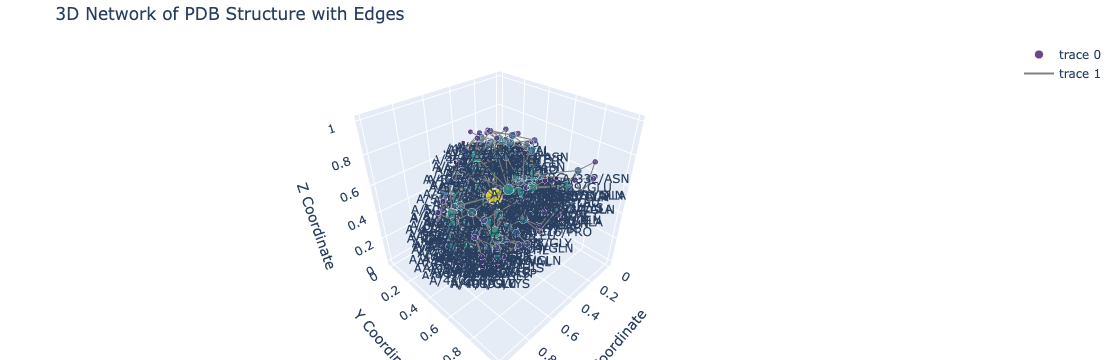

In [10]:
import json
import plotly.graph_objects as go

# Load the JSON data from a file
with open('/Users/davidfoutch/Desktop/7tt8.json', 'r') as file:
    json_data = json.load(file)

# Extract node and edge data from the loaded JSON
nodes = json_data['elements']['nodes']
edges = json_data['elements'].get('edges', [])  # Get edges, or default to an empty list

# Extract node coordinates and other data
node_positions = {node['data']['id']: (node['data']['x_coord'], node['data']['y_coord'], node['data']['z_coord']) for node in nodes}
x_coords = [pos[0] for pos in node_positions.values()]
y_coords = [pos[1] for pos in node_positions.values()]
z_coords = [pos[2] for pos in node_positions.values()]
labels = list(node_positions.keys())
degrees = [node['data']['degree'] for node in nodes]

# Create a 3D scatter plot for the nodes
node_trace = go.Scatter3d(
    x=x_coords, 
    y=y_coords, 
    z=z_coords,
    mode='markers+text',
    textposition="bottom center",
    marker=dict(
        size=[5 + degree for degree in degrees],  # Size by degree
        color=degrees,  # Color by degree
        colorscale='Viridis',  # Color scale
        opacity=0.8
    ),
    text=labels,  # Display the node ID on hover
    hoverinfo='text'
)

# Prepare the edges (lines between nodes)
edge_x = []
edge_y = []
edge_z = []

for edge in edges:
    source_node = edge['data']['source']
    target_node = edge['data']['target']
    
    # Get the positions of the source and target nodes
    if source_node in node_positions and target_node in node_positions:
        x0, y0, z0 = node_positions[source_node]
        x1, y1, z1 = node_positions[target_node]
    
        # Add the coordinates for the edge (line)
        edge_x.extend([x0, x1, None])  # None separates the edges
        edge_y.extend([y0, y1, None])
        edge_z.extend([z0, z1, None])

# Create a 3D line plot for the edges
edge_trace = go.Scatter3d(
    x=edge_x,
    y=edge_y,
    z=edge_z,
    mode='lines',
    line=dict(color='gray', width=2),
    hoverinfo='none'
)

# Create the 3D plot
fig = go.Figure(data=[node_trace, edge_trace])

# Set plot title and axis labels
fig.update_layout(
    title="3D Network of PDB Structure with Edges",
    scene=dict(
        xaxis_title='X Coordinate',
        yaxis_title='Y Coordinate',
        zaxis_title='Z Coordinate'
    ),
    margin=dict(l=0, r=0, b=0, t=40)  # Adjust margins
)

# Show the figure
fig.show()


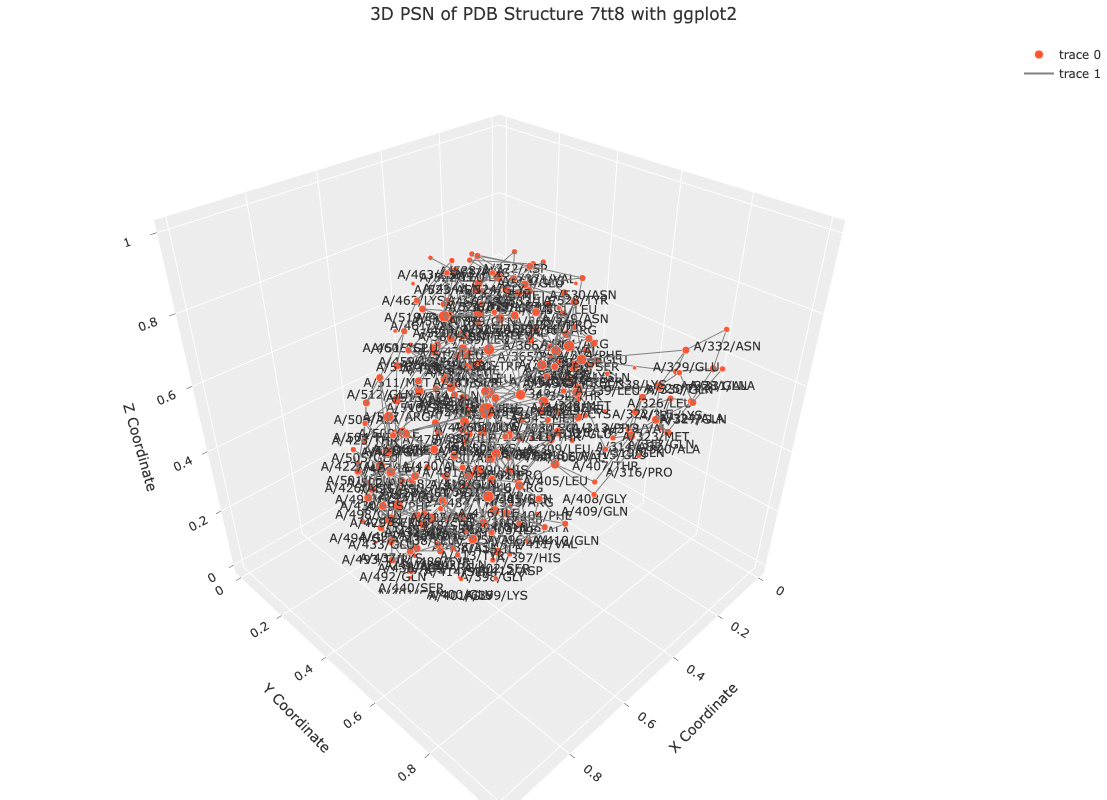

In [17]:
import json
import plotly.graph_objects as go

# Load the JSON data from a file
with open('/Users/davidfoutch/Desktop/7tt8.json', 'r') as file:
    json_data = json.load(file)

# Extract node and edge data from the loaded JSON
nodes = json_data['elements']['nodes']
edges = json_data['elements'].get('edges', [])  # Get edges, or default to an empty list

# Extract node coordinates and other data
node_positions = {node['data']['id']: (node['data']['x_coord'], node['data']['y_coord'], node['data']['z_coord']) for node in nodes}
x_coords = [pos[0] for pos in node_positions.values()]
y_coords = [pos[1] for pos in node_positions.values()]
z_coords = [pos[2] for pos in node_positions.values()]
labels = list(node_positions.keys())
degrees = [node['data']['degree'] for node in nodes]

# Create a 3D scatter plot for the nodes
node_trace = go.Scatter3d(
    x=x_coords, 
    y=y_coords, 
    z=z_coords,
    mode='markers+text',
    textposition="bottom center",
    marker=dict(
        size=[5 + degree for degree in degrees],  # Size by degree
        # color=degrees,  # Color by degree
        # colorscale='sunsetdark',  # Use a ggplot2-inspired color scale
        color='#FF5733',
        opacity=1.0
    ),
    text=labels,  # Display the node ID on hover
    hoverinfo='text'
)

# Prepare the edges (lines between nodes)
edge_x = []
edge_y = []
edge_z = []

for edge in edges:
    source_node = edge['data']['source']
    target_node = edge['data']['target']
    
    # Get the positions of the source and target nodes
    if source_node in node_positions and target_node in node_positions:
        x0, y0, z0 = node_positions[source_node]
        x1, y1, z1 = node_positions[target_node]
    
        # Add the coordinates for the edge (line)
        edge_x.extend([x0, x1, None])  # None separates the edges
        edge_y.extend([y0, y1, None])
        edge_z.extend([z0, z1, None])

# Create a 3D line plot for the edges
edge_trace = go.Scatter3d(
    x=edge_x,
    y=edge_y,
    z=edge_z,
    mode='lines',
    line=dict(color='gray', width=2),
    hoverinfo='none'
)

# Create the 3D plot
fig = go.Figure(data=[node_trace, edge_trace])

# Set plot title and axis labels
fig.update_layout(
    title="3D PSN of PDB Structure 7tt8 with ggplot2",
    template='ggplot2',
    width=1000,  
    height=800,  
    scene=dict(
        xaxis_title='X Coordinate',
        yaxis_title='Y Coordinate',
        zaxis_title='Z Coordinate'
    ),
    margin=dict(l=0, r=0, b=0, t=40)  # Adjust margins
)

# Show the figure
fig.show()


In [ ]:
{
  "data": {
    "degree": 1,
    "chain": "A",
    "resi": 299,
    "resn": "ALA",
    "x_coord": 0.277,
    "dssp": " ",
    "pdbFileName": "7tt8#299.A",
    "y_coord": 0.436,
    "z_coord": 0.013,
    "id": "A/299/ALA",
    "value": "A/299/ALA",
    "name": "A/299/ALA"
  }
}


In [ ]:
{
  "data": {
    "interaction": "HBOND",
    "frequency": 1.000,
    "energy": 17.000,
    "distance": 3.636,
    "atom1": "O",
    "atom2": "ND2",
    "source": "A/299/ALA",
    "target": "A/488/ASN",
    "key": 0
  }
}
